In [1]:
#ALL IMPORTS
import os, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow import *
import keras
import h5py


from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix


from tensorflow.keras import datasets, layers, models,callbacks
from keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation, Lambda
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

import skimage

In [77]:
#Defining a function to load data
def load_data(decays, start, stop):
    global input_dir
    dsets = [h5py.File('%s/%s.hdf5'%(input_dir,decay)) for decay in decays]
    # print(dsets)
    X = np.concatenate([dset['/X'][start:stop] for dset in dsets])
    y = np.concatenate([dset['/y'][start:stop] for dset in dsets])
    assert len(X)==len(y)
    return X,y
    
start = 0
stop = 20000
img_rows, img_cols, nb_channels = 32, 32, 2
input_dir = "C:/Users/hp/Downloads"
decays = ['SinglePhotonPt50_IMGCROPS_n249k_RHv1', "SingleElectronPt50_IMGCROPS_n249k_RHv1"]

X,y = load_data(decays, start, stop)

In [78]:
print("Shape of X (number of images, length dimension, breadth dimension, no. of channels) =",X.shape)
print("So, number of images in the dataset taken: ", len(X))

Shape of X (number of images, length dimension, breadth dimension, no. of channels) = (40000, 32, 32, 2)
So, number of images in the dataset taken:  40000


In [79]:
#Splitting into training testing and validation dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
x_train, x_val, y_train, y_val= train_test_split(x_train, y_train, test_size=0.2, random_state=2)
print("Train images:",len(x_train))
print("Val images:",len(x_val))
print("Test images:",len(x_test))

Train images: 25600
Val images: 6400
Test images: 8000


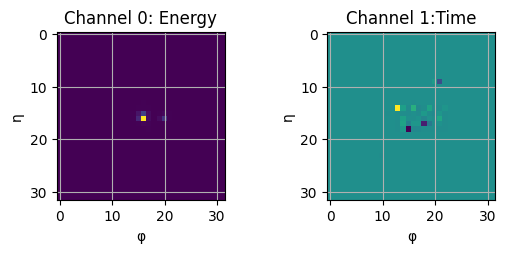

In [80]:
#EXAMPLE IMAGE
plt.figure(1)

plt.subplot(221)
plt.imshow(x_train[1,:,:,0]) #First image from X_train, channel 0: Energy
plt.title("Channel 0: Energy")
plt.ylabel('η')
plt.xlabel('φ')
plt.grid(True)

plt.subplot(222)
plt.imshow(x_train[1,:,:,1])  #Second image from X_train, channel a: Energy
plt.title("Channel 1:Time")
plt.ylabel('η')
plt.xlabel('φ')
plt.grid(True)

# plt.show()
# plt.savefig("C:/Users/hp/Downloads/Energy-Time.png")

In [107]:
#FIRST MODEL
model1= models.Sequential()
model1.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,2)))
model1.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(units=64, activation='relu'))
model1.add(layers.Dense(units=1, activation='sigmoid'))

model1.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_140 (Conv2D)         (None, 30, 30, 32)        608       
                                                                 
 conv2d_141 (Conv2D)         (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_142 (Conv2D)         (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_61 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_143 (Conv2D)         (None, 4, 4, 64)        

In [108]:
#SECOND MODEL
model2= models.Sequential()
model2.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,2)))
model2.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model2.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(units=64, activation='relu'))
model2.add(layers.Dense(units=1, activation='sigmoid'))
model2.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_145 (Conv2D)         (None, 30, 30, 32)        608       
                                                                 
 conv2d_146 (Conv2D)         (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_147 (Conv2D)         (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_64 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_148 (Conv2D)         (None, 4, 4, 64)        

In [109]:
#THIRD MODEL
model3= models.Sequential()
model3.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,2)))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model3.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model3.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model3.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model3.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model3.add(layers.Flatten())
model3.add(layers.Dense(units=64, activation='relu'))
model3.add(layers.Dense(units=128, activation='relu'))
model3.add(layers.Dense(units=1, activation='sigmoid'))
model3.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_150 (Conv2D)         (None, 30, 30, 32)        608       
                                                                 
 max_pooling2d_66 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_151 (Conv2D)         (None, 13, 13, 64)        18496     
                                                                 
 conv2d_152 (Conv2D)         (None, 11, 11, 64)        36928     
                                                                 
 conv2d_153 (Conv2D)         (None, 9, 9, 64)          36928     
                                                                 
 conv2d_154 (Conv2D)         (None, 7, 7, 64)          36928     
                                                     

In [113]:
model1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=1.e-3),
    metrics=['accuracy'])
model2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=1.e-3),
    metrics=['accuracy'])
model3.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=1.e-3),
    metrics=['accuracy'])


In [114]:
#FITTING THE MODEL
history1= model1.fit(x_train, y_train, epochs=10,batch_size=32,validation_data=(x_val, y_val),verbose=1)
history2= model2.fit(x_train, y_train, epochs=10,batch_size=32,validation_data=(x_val, y_val),verbose=1)
history3= model3.fit(x_train, y_train, epochs=3,batch_size=32,validation_data=(x_val, y_val),verbose=1)

Epoch 1/10
800/800 [==============================] - 21s 24ms/step - loss: 0.6739 - accuracy: 0.5739 - val_loss: 0.6594 - val_accuracy: 0.6125
Epoch 2/10
800/800 [==============================] - 18s 22ms/step - loss: 0.6536 - accuracy: 0.6181 - val_loss: 0.6510 - val_accuracy: 0.6277
Epoch 3/10
800/800 [==============================] - 19s 24ms/step - loss: 0.6440 - accuracy: 0.6332 - val_loss: 0.6391 - val_accuracy: 0.6419
Epoch 4/10
800/800 [==============================] - 18s 23ms/step - loss: 0.6301 - accuracy: 0.6533 - val_loss: 0.6232 - val_accuracy: 0.6616
Epoch 5/10
800/800 [==============================] - 18s 22ms/step - loss: 0.6169 - accuracy: 0.6689 - val_loss: 0.6181 - val_accuracy: 0.6658
Epoch 6/10
800/800 [==============================] - 18s 23ms/step - loss: 0.6066 - accuracy: 0.6808 - val_loss: 0.6110 - val_accuracy: 0.6745
Epoch 7/10
800/800 [==============================] - 18s 22ms/step - loss: 0.5995 - accuracy: 0.6887 - val_loss: 0.6126 - val_accuracy:

In [116]:
# model1.save_weights('CNNEP1(20000).h5')
# model2.save_weights('CNNEP2(20000).h5')
# model3.save_weights('CNNEP3(20000).h5')

model1.load_weights('CNNEP1(20000).h5')
model2.load_weights('CNNEP2(20000).h5')
model3.load_weights('CNNEP3(20000).h5')

In [117]:
#EVALUATING ACCURACY AND LOSS ON TEST SET
print("Model 1 evaluation:")
score = model1.evaluate(x_test,y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1],'\n')

print("Model 2 evaluation:")
score = model2.evaluate(x_test,y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1],'\n')

print("Model 2 evaluation:")
score = model2.evaluate(x_test,y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model 1 evaluation:
250/250 [==============================] - 3s 12ms/step - loss: 0.6201 - accuracy: 0.6737
Test loss: 0.6201475858688354
Test accuracy: 0.6737499833106995 

Model 2 evaluation:
250/250 [==============================] - 3s 14ms/step - loss: 0.6191 - accuracy: 0.6650
Test loss: 0.6191321611404419
Test accuracy: 0.6650000214576721 

Model 2 evaluation:
250/250 [==============================] - 3s 13ms/step - loss: 0.6191 - accuracy: 0.6650
Test loss: 0.6191321611404419
Test accuracy: 0.6650000214576721


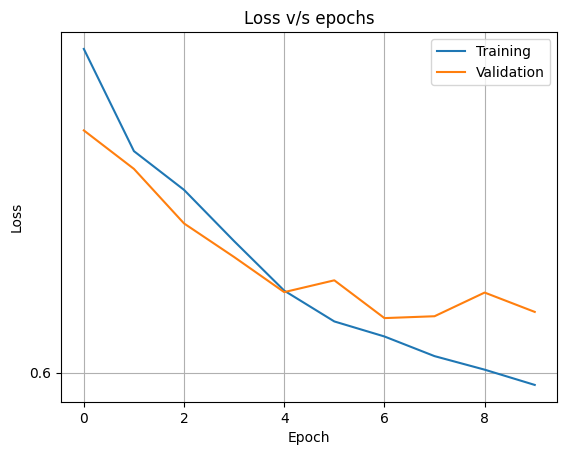

In [93]:
#LOSS V/S EPOCHS PLOT
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 50, 2))
ax.set_yticks(np.arange(0, 2., 0.1))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.title("Loss v/s epochs")
# plt.savefig('Loss_m3(20k).png', bbox_inches='tight')
plt.show()

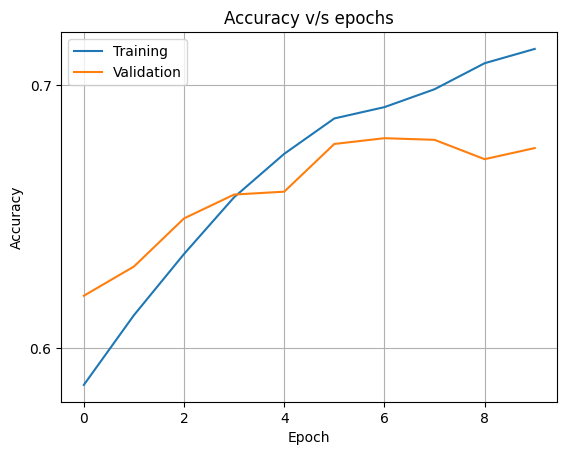

In [96]:
#ACCURACY V/S EPOCHS PLOT
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 50, 2))
ax.set_yticks(np.arange(0, 1., 0.1))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.grid()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.title("Accuracy v/s epochs")
# plt.savefig('Acc_m1(20k).png', bbox_inches='tight')
plt.show()

250/250 [==============================] - 3s 12ms/step


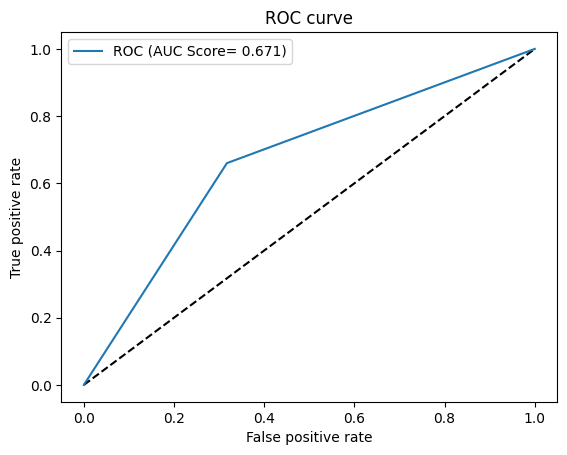

In [120]:
#PLOTTING ROC CURVE
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_pred1 = model3.predict(x_test)
y_pred1[y_pred1 <= 0.5] = 0
y_pred1[y_pred1 > 0.5] = 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
auc = auc(fpr, tpr)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC (AUC Score= {:.3f})'.format(auc))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('ROC_m3(20k).png', bbox_inches='tight')
plt.show()